# spice.py 使用示例：一个差分放大器的计算

本例中计算以下差分放大器的传输特性[(来源)](https://sites.bu.edu/engcourses/files/2016/08/mosfet-differential-amplifier.pdf)。

![](circuit.png)

In [1]:
from spice import V,R,MOSFET,solve,clear,Vertex
from numpy import linspace

NMOS = lambda G,D,S,ratio,V_DS=2: MOSFET(G=G,D=D,S=S,mode="depletion",
        V_TN=1,channel="N",K=ratio*1e-5,l=1e-2,V_DS=V_DS)
PMOS = lambda G,D,S,ratio,V_DS=2: MOSFET(G=G,D=D,S=S,mode="depletion",
        V_TN=1,channel="P",K=ratio*5e-6,l=1e-2,V_DS=V_DS)

In [2]:
V("VCC","GND",10)
V1=V("V1","GND",5) #共模输入
V2=V("V2","V1",4e-3) #差分输入

# 上面的电流镜
PMOS(D=2,G=2,S="VCC",ratio=5/11)
PMOS(D=3,G=2,S="VCC",ratio=5/11)

# 下面的电流镜
R("VCC",1,1e4)
NMOS(D=1,     G=1,S="GND",ratio= 1)
NMOS(D=4,     G=1,S="GND",ratio=.2)
NMOS(D="Vout",G=1,S="GND",ratio= 1)

# 输入MOS管
NMOS(D=2,G="V1",S=4,ratio=4)
NMOS(D=3,G="V2",S=4,ratio=4)

# 输出MOS管
PMOS(S="VCC",G=3,D="Vout",ratio=9/2)

res = solve(full_output=True)

LinAlgError: Singular matrix

程序报错，提示有奇异矩阵。事实上，如果一个环路完全由MOS管源漏相连组成，就会出现以上错误。可通过手动添加几个小电阻解决。

In [3]:
clear() # 清楚之前的电路。重画电路必须调用

V("VCC","GND",10)
V1=V("V1","GND",5)
V2=V("V2","V1",4e-3)

R("VCC",1,1e4)
NMOS(D=1,     G=1,S="GND",ratio= 1)
NMOS(D=4,     G=1,S="GND",ratio=.2)
NMOS(D="Vout",G=1,S="GND",ratio= 1)

R("VCC","X1",1e-3)
R("VCC","X2",1e-3)
R("VCC","X3",1e-3)

PMOS(D=2,G=2,S="X1",ratio=5/11)
PMOS(D=3,G=2,S="X2",ratio=5/11)

NMOS(D=2,G="V1",S=4,ratio=4)
NMOS(D=3,G="V2",S=4,ratio=4)

PMOS(S="X3",G=3,D="Vout",ratio=9/2)

res=solve(full_output=True,disp=1)
print(res)

15999.99999184
15991.640721142576
15723.733415880179
14935.133474720164
13734.76035570073
12368.010513035244
10842.20444906071
8872.424551419212
6284.303041633575
3539.1196670560716
1547.0764849600018
795.2586583210235
360.65739827590886
166.05656336092778
2.1657965938941856e-05
2.0256645199318198e-06
2.7139994584004807e-08
res(sol=array([-8.55460217e-04,  0.00000000e+00,  0.00000000e+00,  3.92059983e-04,
        3.92059983e-04,  6.86506792e-05,  3.94749553e-04,  3.42513194e-05,
        3.43993597e-05,  3.94749553e-04, -3.42513194e-05, -3.43993597e-05,
        3.42513194e-05,  3.43993597e-05, -3.94749553e-04,  6.07940017e+00,
        4.08423528e+00,  6.80711513e+00, -3.81017600e+00, -4.25886016e+00,
        2.10558869e+00,  1.65690452e+00, -3.19288448e+00,  1.00000000e+00]), done=True, step=18, msg='')


以上结果显示了求解过程中Newton-Raphson迭代中误差的变化。

接下来计算差分输入从-0.1V到0.1V变化时输出的变化。

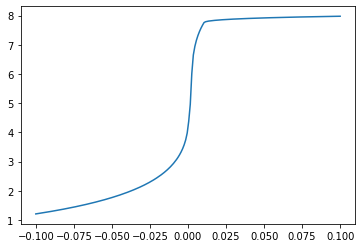

In [4]:
vdc = linspace(-.1,.1,200)
vout = []
for v in vdc:
    V2.U = v
    res = solve(eps=1e-8,N=1000,disp=0,full_output=True)
    if not res.done:
        print(res.msg)
        break
    vout.append(Vertex("Vout").V @ res.sol)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(vdc,vout)